# Topics in Data Preprocessing

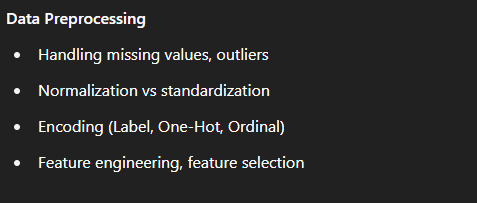

# Data Preprocessing

Preprocessing transforms raw data into a clean, structured format suitable for machine learning.

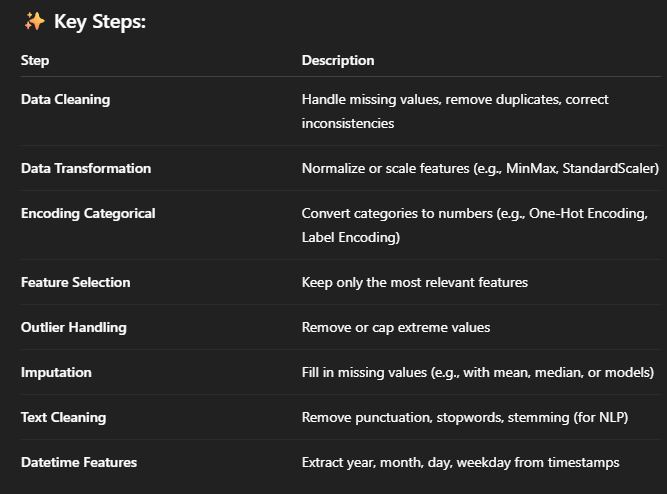

## 1. Categorial

In Machine Learning (ML), the term "categorical" refers to categorical data, which consists of discrete values or categories that represent different groups or labels rather than continuous numerical values.

📌 Characteristics of Categorical Data:

🔸Values are distinct and not ordered (in nominal data).

🔸Cannot be meaningfully measured with arithmetic operations.

🔸Often represented as text labels (e.g., "Red", "Blue", "Green").

🔸Needs to be converted into numerical format before feeding into most ML models.

🧠 Types of Categorical Data:

1. Nominal – Categories with no intrinsic order (e.g., "Male", "Female", "Other").

2. Ordinal – Categories with a clear order, but no fixed spacing between categories (e.g., "Low", "Medium", "High").

🔄 Encoding Techniques:

Because most ML algorithms cannot handle raw categorical data, you usually convert them using:

1. Label Encoding – Converts each category to a unique number.

2. One-Hot Encoding – Creates binary columns for each category.

3. Ordinal Encoding – Assigns ordered numbers (useful for ordinal data).

4. Target Encoding / Frequency Encoding – Based on target variable or frequency of categories (used in some advanced techniques).

In [ ]:
# Example:

# Original Data

Color = ['Red', 'Blue', 'Green']

# One-Hot Encoding

Red   Blue   Green
1      0      0
0      1      0
0      0      1


## 1.1. Dummy Variables

Dummy variables are binary (0 or 1) variables created to represent categorical data in numerical form. Each category becomes a new column (variable), where:

🔸1 indicates the presence of that category.

🔸0 indicates absence.

This process is the same as One-Hot Encoding, and it's essential because most ML algorithms require numeric input.

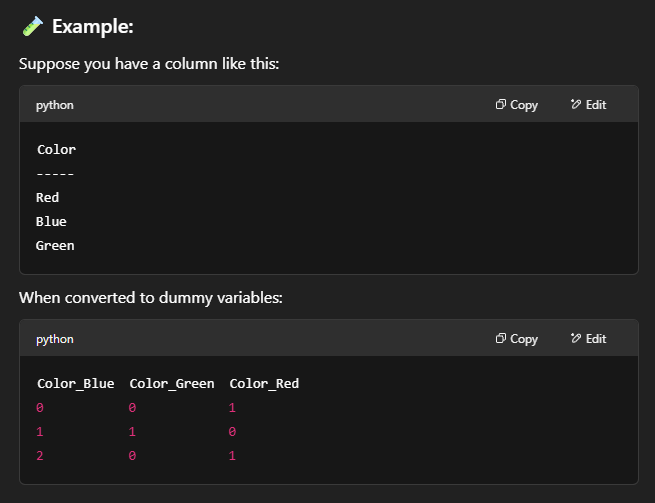

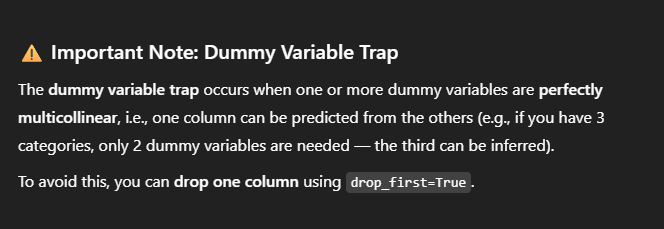

In [76]:
# Example:

import pandas as pd
from sklearn.linear_model import LinearRegression

# Create a Dataset

df = pd.read_csv(r"C:\Users\admin\Downloads\homeprices.csv")


# Generate dummy variables, drop the first to avoid a trap

df_Dummies = pd.get_dummies(df.town)
df_Dummies = Dummies.astype(int)

print(df_Dummies)


# Combine the dummies with the Dataset

Mereged = pd.concat([df, Dummies], axis = 'columns')
print(Mereged)


# Remove Town & For Dummy trap, we need to remove one dummy column

Final = Mereged.drop(['town', 'west windsor'],axis = 'columns')
print(Final)


# Create & Train 

x = Final.drop(['price'],axis = 'columns')

y = Final.price

Model = LinearRegression()
Model.fit(x,y)

# Predict price for a 2800 sq ft house in Robbinsville

To_Find = pd.DataFrame([[2800, 0, 1]], columns=['area', 'monroe township', 'robinsville'])

Y_pred = Model.predict(To_Find)
print('\n The predicted price for 2800 sq ft house in Robbinsville :', Y_pred)

# To Find Accuracy

Accuracy = Model.score(x,y)*100
print('Accuracy', Accuracy)


    monroe township  robinsville  west windsor
0                 1            0             0
1                 1            0             0
2                 1            0             0
3                 1            0             0
4                 1            0             0
5                 0            0             1
6                 0            0             1
7                 0            0             1
8                 0            0             1
9                 0            1             0
10                0            1             0
11                0            1             0
12                0            1             0
               town  area   price  monroe township  robinsville  west windsor
0   monroe township  2600  550000                1            0             0
1   monroe township  3000  565000                1            0             0
2   monroe township  3200  610000                1            0             0
3   monroe township  3600  680

## 1.2. Encoding

Encoding is the process of converting categorical data (non-numeric) into a numerical format so it can be understood and processed by machine learning models.

Most ML algorithms can’t handle strings or text categories directly, so encoding is required.

## 📘 Types of Encoding

#### 1. Label Encoding

🔸Converts each category to a unique integer.

🔸Simple and memory-efficient.

🔸Good for ordinal data (where order matters).

🔸Not ideal for nominal data in linear models (may introduce false order).

In [121]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Dataset

df = pd.read_csv(r"C:\Users\admin\Downloads\homeprices.csv")

# Label Encoder

LE = LabelEncoder()

Enc = LE.fit_transform(df['town'])
print('LabelEncoder :',Enc)

# Label Encoded in the Dataset

df['town'] = Enc

print(df)


LabelEncoder : [0 0 0 0 0 2 2 2 2 1 1 1 1]
    town  area   price
0      0  2600  550000
1      0  3000  565000
2      0  3200  610000
3      0  3600  680000
4      0  4000  725000
5      2  2600  585000
6      2  2800  615000
7      2  3300  650000
8      2  3600  710000
9      1  2600  575000
10     1  2900  600000
11     1  3100  620000
12     1  3600  695000


#### 2. One-Hot Encoding

🔸 Converts each category into a new binary column (0/1).

🔸 Avoids introducing any order.

🔸 Works well for nominal data.

🔸 May lead to high dimensionality if the category has many unique values.

In [151]:

from sklearn.preprocessing import OneHotEncoder

# Dataset 

df

# Initialize encoder

OHE = OneHotEncoder(sparse_output=False)

# Fit and transform

x_ohe = OHE.fit_transform(df[['town']])

print(x_ohe)

# Convert to DataFrame for readability

encoded_df = pd.DataFrame(x_ohe, columns=OHE.get_feature_names_out(['town']))

print(encoded_df)


[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
    town_0  town_1  town_2
0      1.0     0.0     0.0
1      1.0     0.0     0.0
2      1.0     0.0     0.0
3      1.0     0.0     0.0
4      1.0     0.0     0.0
5      0.0     0.0     1.0
6      0.0     0.0     1.0
7      0.0     0.0     1.0
8      0.0     0.0     1.0
9      0.0     1.0     0.0
10     0.0     1.0     0.0
11     0.0     1.0     0.0
12     0.0     1.0     0.0


#### 3. Ordinal Encoding

🔸Maps categories to integers based on a defined order.

🔸Useful for data like: ['Low', 'Medium', 'High']

In [ ]:

from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df['encoded'] = oe.fit_transform(df[['Priority']])


#### 4. Binary Encoding

🔸Converts categories into binary and splits the digits into separate columns.

🔸Memory-efficient; useful for high-cardinality categorical features.

Available in libraries like category_encoders.

#### 5. Target Encoding (Mean Encoding)


🔸Replace each category with the mean of the target variable for that category.

🔸Common in Kaggle competitions.

Risk: Target leakage if not used carefully with proper validation.

#### Frequency Encoding


🔸Replace each category with its frequency count.

In [ ]:

df['Color_encoded'] = df['Color'].map(df['Color'].value_counts())


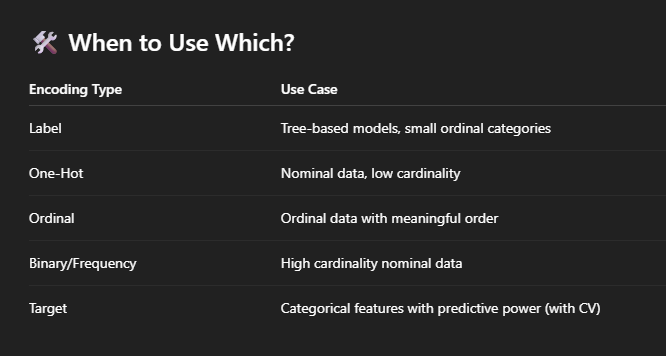

## 2. Normalization vs Standardization

Normalization and Standardization are both techniques used to rescale features in a dataset, especially important when features have different units or ranges. But they serve different purposes and behave differently.

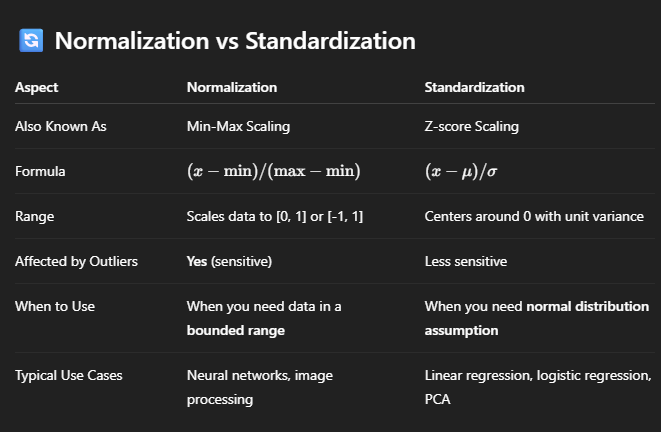

In [15]:
# Example:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Sample data
df = pd.DataFrame({'value': [10, 20, 30, 40, 50]})

# Normalization
norm = MinMaxScaler()
df['normalized'] = norm.fit_transform(df[['value']])

# Standardization
std = StandardScaler()
df['standardized'] = std.fit_transform(df[['value']])

print(df)


   value  normalized  standardized
0     10        0.00     -1.414214
1     20        0.25     -0.707107
2     30        0.50      0.000000
3     40        0.75      0.707107
4     50        1.00      1.414214


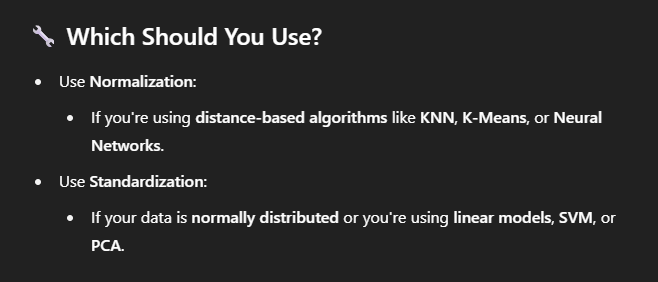

# EDA

EDA (Exploratory Data Analysis) is the process of analyzing datasets to summarize their main characteristics, often with visual methods, before applying any machine learning model.

🔍 Goals of EDA:

Understand data structure.

Detect missing or inconsistent data.

Find patterns, trends, and relationships.

Decide on the next steps: feature selection, data cleaning, or modeling.



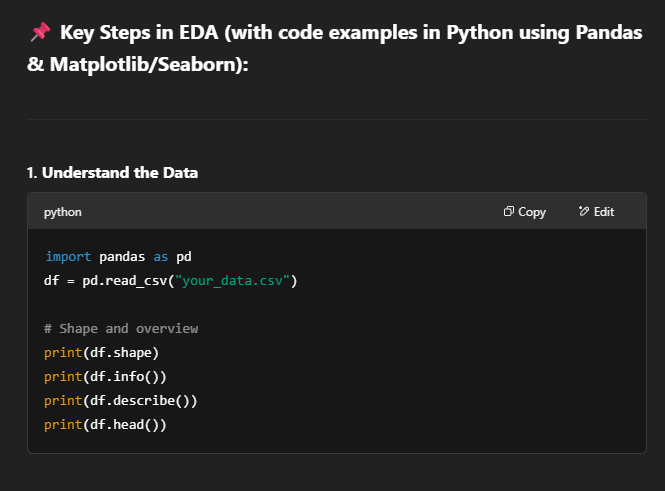

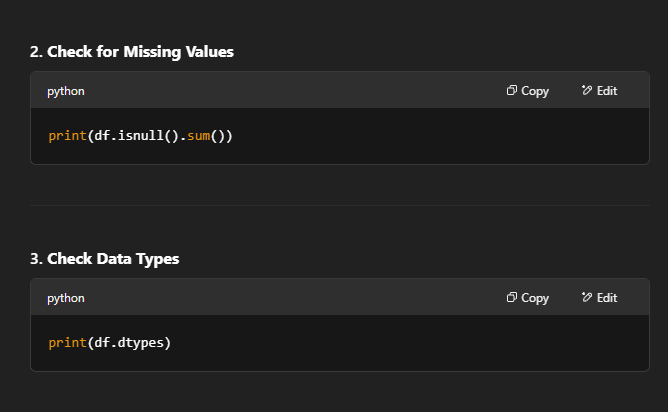

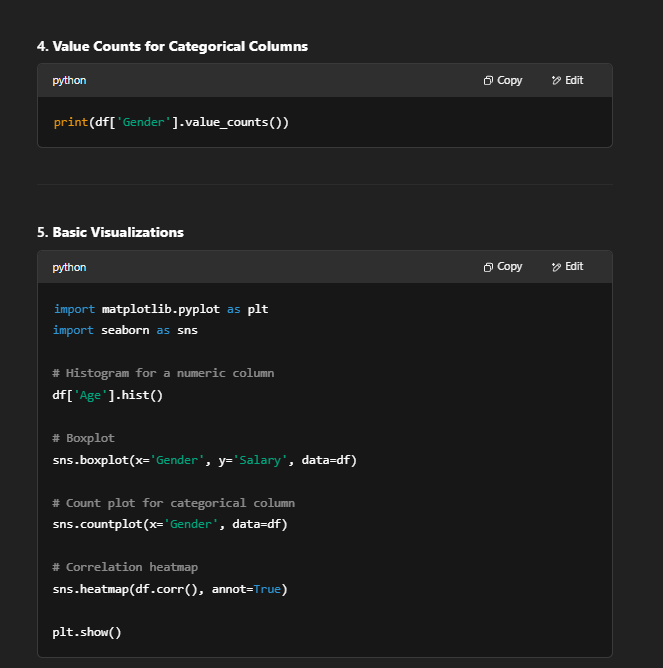

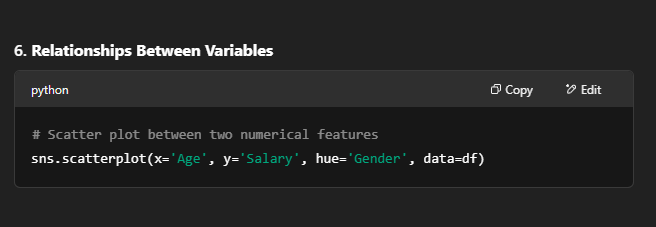

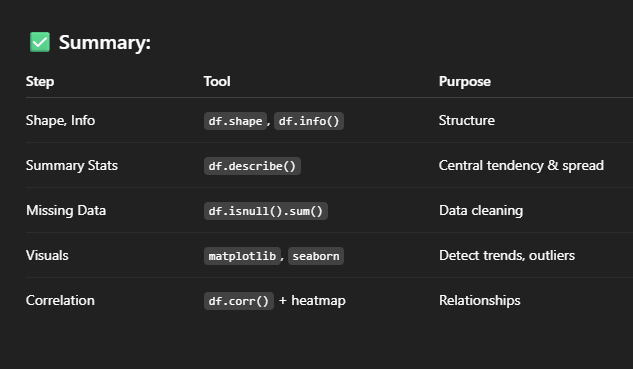